# 일반적인 이진 분류에서의 SVM

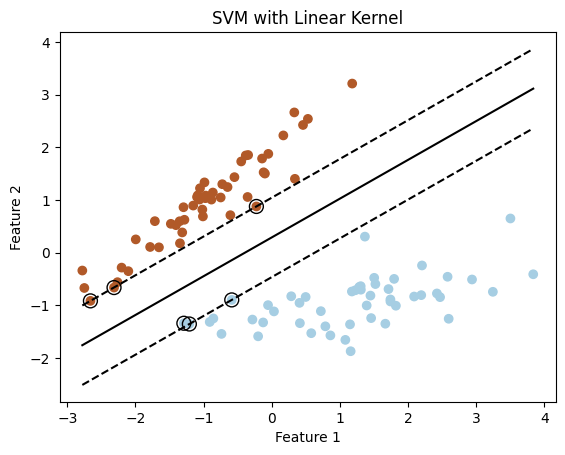

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# 더미 데이터 생성
X, y = make_classification(random_state=19980719, n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# SVM 분류기 생성 및 학습
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# 초평면 및 마진 계산
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# 마진을 계산하는 두 선
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# 데이터 및 초평면 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 서포트 벡터 시각화
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 그래프 요소 설명
- 직선: 초평면, 이 직선을 기준으로 데이터를 분류한다.
- 점선: 마진을 나타내는 직선
- 검은 원: 서포트 벡터

# 근데 선이 아니면 어떡하죠?

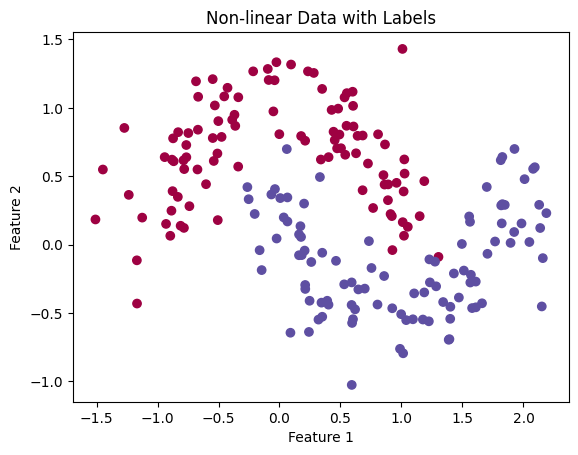

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# 비선형 데이터 생성
X, y = make_moons(n_samples=200, noise=0.2, random_state=19980719)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Non-linear Data with Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

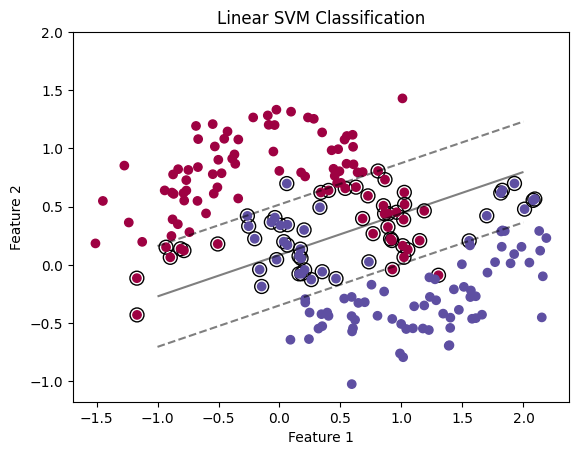

In [ ]:
from sklearn.svm import SVC

# 선형 SVM 분류기 생성 및 학습
clf = SVC(kernel='linear')
clf.fit(X, y)

# 결정 경계 시각화
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0] - 1, xlim[1] + 1, 30)
yy = np.linspace(ylim[0] - 1, ylim[1] + 1, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plt.title('Linear SVM Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Decision Tree는 잘 할 수 있을까...?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 비선형 데이터 생성
X, y = make_moons(n_samples=200, noise=0.2, random_state=19980719)

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Decision Tree 분류기 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=19980719)
dt_clf.fit(X_train, y_train)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')

Decision Tree Accuracy: 0.9
SVM Accuracy: 0.875


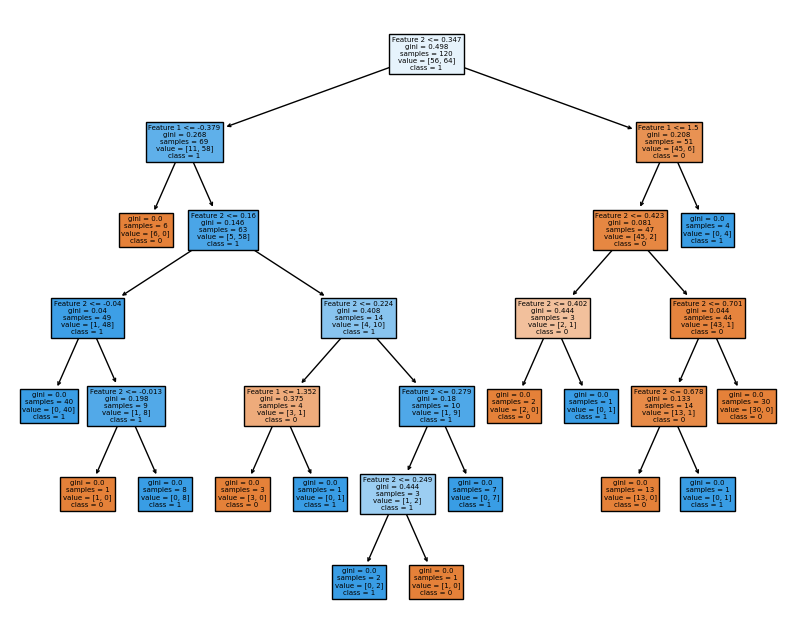

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.show()

## 노이즈를 더 넣으면, decision tree도 잘 못하지 않을까?!

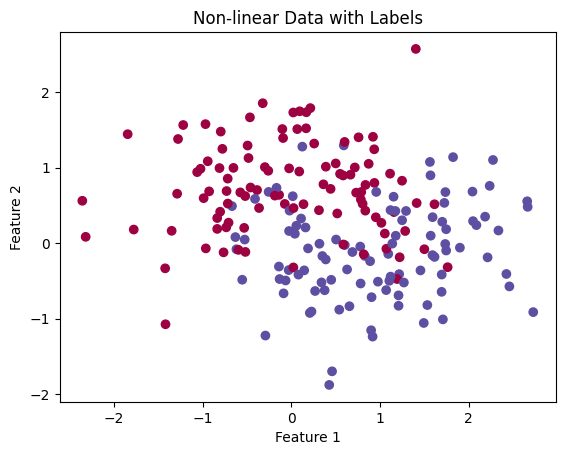

Decision Tree Accuracy: 0.7875
SVM Accuracy: 0.8375


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 비선형 데이터 생성
X, y = make_moons(n_samples=200, noise=0.5, random_state=19980719)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Non-linear Data with Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Decision Tree 분류기 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=19980719)
dt_clf.fit(X_train, y_train)

# SVM 분류기 생성 및 학습
svm_clf = SVC(kernel='linear', random_state=19980719)
svm_clf.fit(X_train, y_train)

# 예측 및 정확도 계산
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 결과 출력
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')

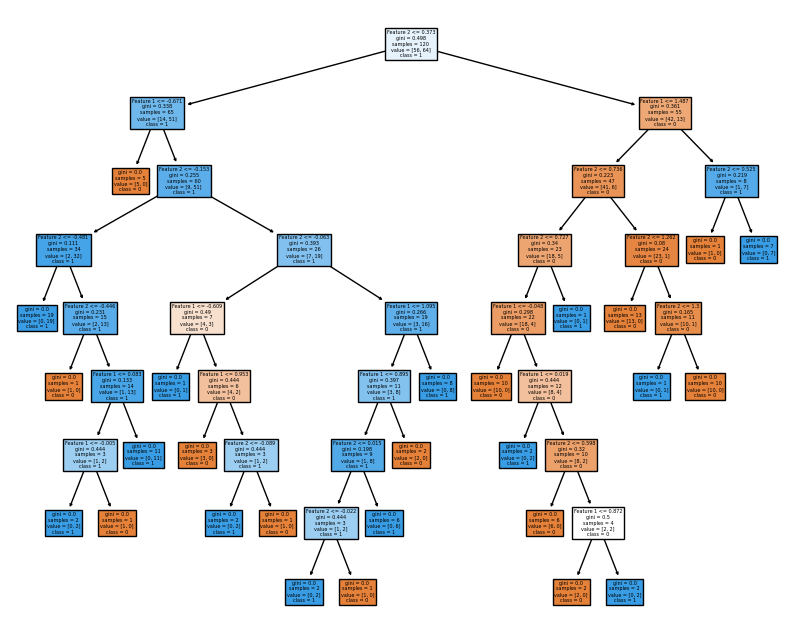

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.show()